# Stacking Algorithm Implementation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
# individual learners of the model
# Meta learner ( the blender)

**Load the data (Breast Cancer Dataset )**

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
display(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
features = data.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
labels = data.target_names
labels

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
df1 = pd.DataFrame(data = data.data,
                       columns = data.feature_names)

df2 = pd.DataFrame(data = data.target,
                       columns = ['Diagnosis'])

dataset = pd.concat([df1, df2], axis = 1)
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Splitting Dataset into Train and Test and Holdout**

In [7]:
! pip install fast_ml --quiet

from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

# x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(dataset, target = 'Diagnosis', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 3.6 MB/s eta 0:00:00


In [8]:
print(x_train.shape)
print(y_train.shape)

(455, 30)
(455,)


# In the first layer we use three predictors

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [10]:
#specifying the initial learners

model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier(criterion='gini', random_state=0)

In [11]:
#training the initial learners
#Fit the data in different classifiers

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
#making predictions for the validation data
preds1 = model1.predict(x_valid)
preds2 = model2.predict(x_valid)
preds3 = model3.predict(x_valid)

#making predictions for the test data
test_preds1 = model1.predict(x_test)
test_preds2 = model2.predict(x_test)
test_preds3 = model3.predict(x_test)

In [13]:
print("Training Accuracy of Random Forest Classifier : ")
print(accuracy_score(y_test, test_preds1))


print("Training Accuracy of Logistic Regression Classifier: ")
print(accuracy_score(y_test, test_preds2))


print("Training Accuracy of Decision Tree Classifier: ")
print(accuracy_score(y_test, test_preds3))

Training Accuracy of Random Forest Classifier : 
0.9473684210526315
Training Accuracy of Logistic Regression Classifier: 
0.9473684210526315
Training Accuracy of Decision Tree Classifier: 
0.8947368421052632


In [14]:
print("Validation Accuracy of Random Forest Classifier : ")
print(accuracy_score(y_valid, preds1))

print()

print("Validation Accuracy of Logistic Regression Classifier: ")
print(accuracy_score(y_valid, preds2))

print()

print("Validation Accuracy of Decision Tree Classifier: ")
print(accuracy_score(y_valid, preds3))

Validation Accuracy of Random Forest Classifier : 
0.9824561403508771

Validation Accuracy of Logistic Regression Classifier: 
0.9122807017543859

Validation Accuracy of Decision Tree Classifier: 
0.9298245614035088


In [15]:
#making a new dataset for training our final model by stacking the predictions on the validation data
train_stack = np.column_stack((preds1,preds2,preds3))

#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

**RandomForestClassifier as final model**

In [16]:
final_model = RandomForestClassifier()

#training the final model on the stacked predictions
final_model.fit(train_stack, y_valid)

RandomForestClassifier()

In [17]:
final_predictions = final_model.predict(test_stack)

In [18]:
print("Accuracy of final model : ")
print(accuracy_score(y_test, final_predictions))

Accuracy of final model : 
0.9473684210526315


In [19]:
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.95      0.97      0.96        38

    accuracy                           0.95        57
   macro avg       0.95      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



**Logistic Regression as final model**

In [20]:
final_model = LogisticRegression()

#training the final model on the stacked predictions
final_model.fit(train_stack, y_valid)

LogisticRegression()

In [21]:
final_predictions = final_model.predict(test_stack)

In [22]:
print("Accuracy of final model : ")
print(accuracy_score(y_test, final_predictions))

Accuracy of final model : 
0.9473684210526315


In [23]:
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.95      0.97      0.96        38

    accuracy                           0.95        57
   macro avg       0.95      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [25]:
# x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(dataset, target = 'Diagnosis', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

In [26]:
#Fit Bagging Classifier on Cancer Dataset

# Instantiate the bagging classifier

bgclassifier = BaggingClassifier()

# Fit the bagging classifier
bgclassifier.fit(x_train, y_train)

# # Model scores on test and training data
# print('Model test Score: %.3f, ' %bgclassifier.score(x_test, y_test),
#       'Model training Score: %.3f' %bgclassifier.score(x_train, y_train))

BaggingClassifier()

In [27]:
pred = bgclassifier.predict(x_test)

print("Training Accuracy of Bagging Classifier : ")
print(accuracy_score(y_test, pred))

Training Accuracy of Bagging Classifier : 
0.9824561403508771


**Use StackingClassifier from sklearn to implement the same on cancer dataset.**

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(dataset, target = 'Diagnosis', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier(criterion='gini', random_state=0)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression(),
    DecisionTreeClassifier(criterion='gini', random_state=0))
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(x_train, y_train).score(x_test, y_test)

0.9298245614035088

**Bagging Classifier**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

In [30]:
# Instantiate the bagging classifier
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

In [31]:
# Fit the bagging classifier
bgclassifier.fit(x_train, y_train)

# Model scores on test and training data
print('Model test Score: %.3f, ' %bgclassifier.score(x_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(x_train, y_train))

Model test Score: 0.947,  Model training Score: 0.969


In [32]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.93      0.97      0.95        39

    accuracy                           0.93        57
   macro avg       0.93      0.90      0.92        57
weighted avg       0.93      0.93      0.93        57



**Random Forest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

print('Model test Score: %.3f, ' %clf.score(x_test, y_test),
      'Model training Score: %.3f' %clf.score(x_train, y_train))

Model test Score: 0.930,  Model training Score: 0.960


In [34]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.91      1.00      0.95        39

    accuracy                           0.93        57
   macro avg       0.95      0.89      0.91        57
weighted avg       0.94      0.93      0.93        57



**Adaboost**

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)

print('Model test Score: %.3f, ' %clf.score(x_test, y_test),
      'Model training Score: %.3f' %clf.score(x_train, y_train))

Model test Score: 0.930,  Model training Score: 1.000


In [37]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.93      0.97      0.95        39

    accuracy                           0.93        57
   macro avg       0.93      0.90      0.92        57
weighted avg       0.93      0.93      0.93        57



# Exercise

**Implement Adaboost Regression on concrete_data.csv.**

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
# Read the house data into a data frame
df = pd.read_csv('/content/drive/MyDrive/SEM-6/ML/Lab-8/Contrete.csv')

In [40]:
# Display the first ten observations
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [50]:
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

df1 = pd.DataFrame(data = df,
                       columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age'])

df2 = pd.DataFrame(data = df,
                       columns = ['csMPa'])

x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [49]:
print(x_train.shape)
print(y_train.shape)

(824, 8)
(824, 1)


In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

clf = AdaBoostRegressor(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)

print('Model test Score: %.3f, ' %clf.score(x_test, y_test),
      'Model training Score: %.3f' %clf.score(x_train, y_train))

Model test Score: 0.808,  Model training Score: 0.824


0.8078426335262439

0.06328441582284237



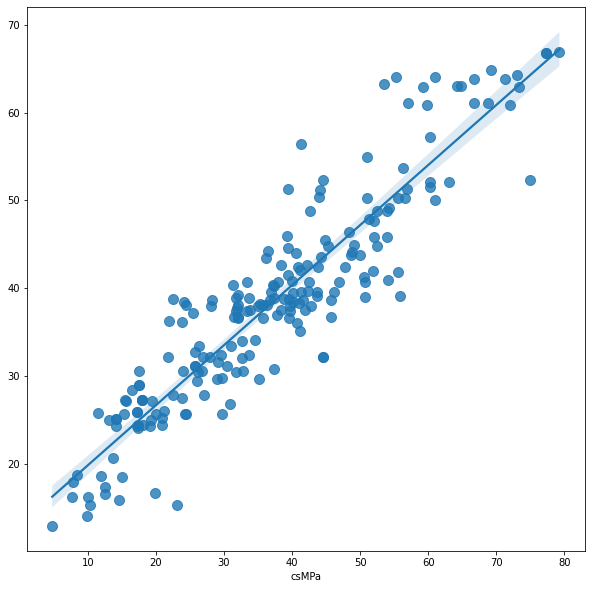

In [66]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

print(metrics.r2_score(y_test, predictions), end="\n\n")
print(metrics.mean_squared_log_error(y_test, predictions), end="\n\n")
    
plt.figure(figsize=(10,10))
sns.regplot(y_test, predictions, fit_reg=True, scatter_kws={"s": 100})